In [27]:
# import the libraries we'll need
import pandas as pd
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [28]:
#file_path = "../../..//data//dataset//change-features.csv"
file_path = "dataset-train.csv"

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the contents of the DataFrame
display(data)

,package,version,PII,file_sys_access,file_process_creation,network_access,cryptographic_functionality,data_encoding,dynamic_code_generation,package_installation,geolocation,minified_code,no_content,longest_line,num_of_files,has_license,label
0,imask-module,0.0.3,0,0,1,0,0,0,0,1,0,0,0,1392,68,1,benign
1,vo-core,1.2.3,0,0,0,1,0,0,0,0,0,0,0,138,10,0,benign
2,flow-bin,0.196.1,0,1,1,0,0,0,0,0,0,1,0,69,14,0,benign
3,notar-cli,1.2.1,1,1,1,1,1,1,1,0,0,0,0,146206,3,0,benign
4,codezist,1.0.0,0,1,1,1,1,1,1,1,0,1,0,592478,3,0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,testername,1.4.11,0,0,0,0,0,0,0,0,0,0,0,26,2,0,malicious
96,cors.js,2.8.5,0,1,1,1,0,1,0,0,0,0,0,131,8,1,malicious
97,vanshpkg,2.0.0,0,1,1,1,0,1,0,0,0,0,0,109,3,0,malicious
98,touching-fish,0.0.1,0,1,1,1,1,1,0,0,0,0,0,85,17,1,malicious


In [29]:
X = data.drop(["package", "version", "label"], axis=1)
y = data["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Train a Random Forest classifier on the training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
recall = recall_score(y_test, y_pred, pos_label='malicious')
cm = confusion_matrix(y_test, y_pred)
print("Model accuracy: {:.2f}%".format(score * 100))
print("Model recall: {:.2f}%".format(recall * 100))

print("Confusion matrix:")
print(cm)

Model accuracy: 75.00%
Model recall: 86.84%
Confusion matrix:
[[27 15]
 [ 5 33]]


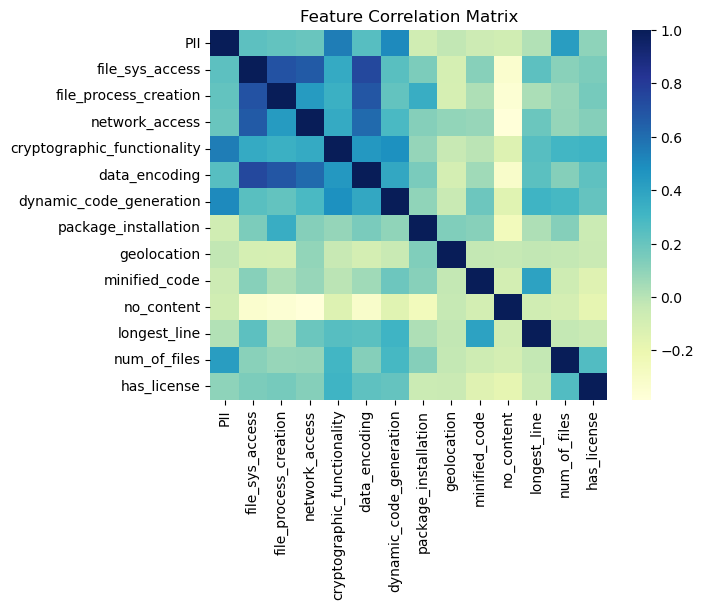

In [30]:
# Calculate the correlation matrix of the features
corr = X.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr, cmap="YlGnBu")
plt.title("Feature Correlation Matrix")
plt.show()

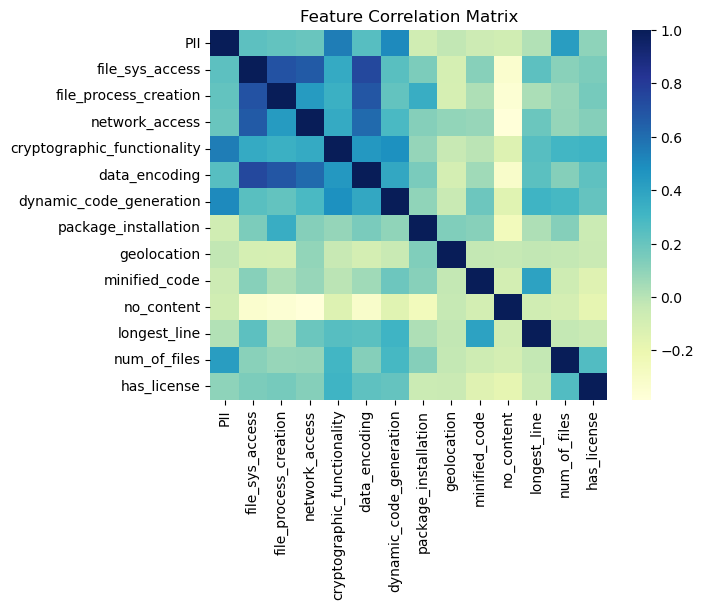

In [31]:
# Calculate the correlation matrix of the features
corr = X.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr, cmap="YlGnBu")
plt.title("Feature Correlation Matrix")
plt.show()

# validate

In [32]:
val_data = pd.read_csv("dataset-validation.csv")
X_val = val_data.drop(["package", "version", "label"], axis=1)
y_val = val_data["label"]

Validation set accuracy: 93.48%
Validation set recall: 100.00%


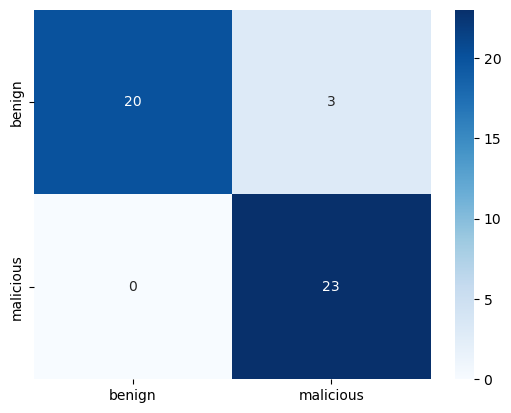

In [33]:
y_pred_val = model.predict(X_val)
score_val = model.score(X_val, y_val)
recall_val = recall_score(y_val, y_pred_val, pos_label='malicious')
print("Validation set accuracy: {:.2f}%".format(score_val * 100))
print("Validation set recall: {:.2f}%".format(recall_val * 100))

# Print the confusion matrix for the validation set
cm = confusion_matrix(y_val, y_pred_val)
model_report = classification_report(y_val, y_pred_val, digits=5)
heatmap = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(y_val), 
                      yticklabels=np.unique(y_val)) 





In [26]:
import pickle
pickle.dump(model, open("dataToDocker.pkl",'wb'))